In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [2]:
import re
import mailbox
import csv

In [4]:
smoking = pd.read_csv('whickham.csv')

In [5]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
outcome    1314 non-null object
smoker     1314 non-null object
age        1314 non-null int64
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [6]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [7]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [8]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [10]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True))

,outcome
Alive,0.719178
Dead,0.280822


In [18]:
# Break the proportion of outcomes by smoker groups

In [35]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [16]:
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [19]:
# Remove one index level to column

In [37]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [20]:
#Stratification - Divide in the age groups with pandas.cut

In [21]:
smoking['ageGroup'] = pd.cut(smoking.age, [0,30,40,53,64], labels=['0-30','30-40','40-53','53-64'])

In [22]:
smoking.head()

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,0-30
1,Alive,Yes,18,0-30
2,Dead,Yes,71,NaN
3,Alive,No,67,NaN
4,Alive,No,64,53-64


In [23]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [24]:
byage.unstack().drop('Dead', axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [25]:
# Simpson's paradox - a trend appears in several different groups of data but disappears or reverses when these groups are combined.

Visualisation

In [26]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [28]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'Smoker')

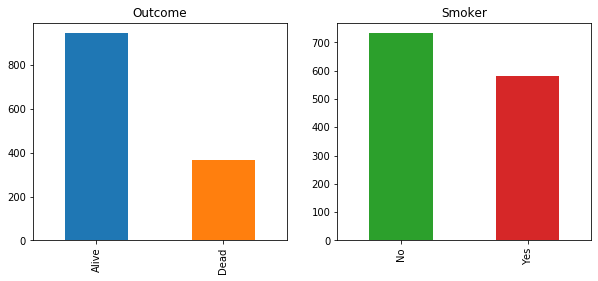

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='bar', color=['C0', 'C1']); plt.title('Outcome')
plt.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='bar', color=['C2', 'C3']); plt.title('Smoker')

Text(0.5, 1.0, 'Smoker')

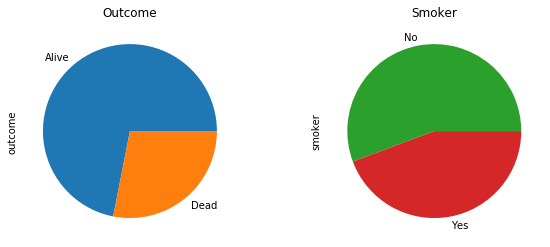

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie', colors=['C0', 'C1']); plt.title('Outcome')
plt.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie', colors=['C2', 'C3']); plt.title('Smoker')

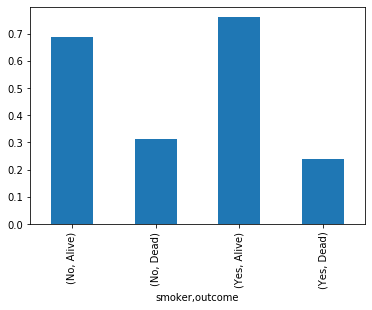

In [32]:
bysmoker.plot(kind='bar')

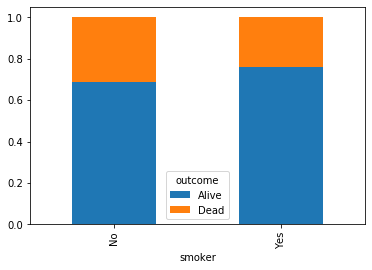

In [40]:
bysmoker.unstack().plot(kind='bar', stacked=True)

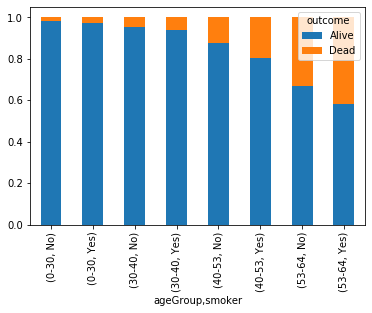

In [41]:
byage.unstack().plot(kind='bar', stacked=True)

In [42]:
byage.unstack()

outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-53    No      0.876106  0.123894
         Yes     0.802395  0.197605
53-64    No      0.669291  0.330709
         Yes     0.580645  0.419355

In [48]:
# Unstack and clean the column names to have a clearer view of the groups

In [44]:
byage.unstack().drop('Dead', axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [45]:
byage2 = byage.unstack().drop('Dead', axis=1).unstack()
byage2.columns= ["No", "Yes"]
byage2.columns.name = "smoker"

In [46]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


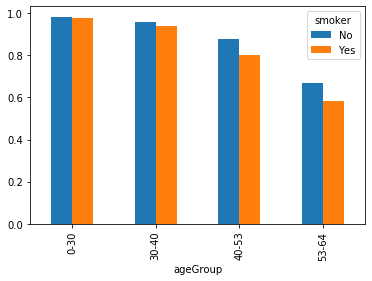

In [47]:
byage2.plot(kind='bar')